<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [8]:
import sys
#!{sys.executable} -m pip install jupyter

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') #снижение избыточной информации

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [10]:
#ваш код здесь
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [11]:
df.head(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [12]:
#ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [13]:
#ваш код здесь
df.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [14]:
#ваш код здесь
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [15]:
print(df['Ищет работу на должность:'].value_counts().index[0])

Системный администратор


In [16]:
#ваш код здесь
df['Уровень образования'] = df['Образование и ВУЗ'].apply(lambda x: re.sub(r'\d.*', '', x).strip())

print(df['Уровень образования'].value_counts())

Уровень образования
Высшее образование                    29088
Среднее специальное образование        5765
Неоконченное высшее образование        4557
Высшее образование (Бакалавр)          2633
Высшее образование (Магистр)           1812
Среднее образование                     559
Высшее образование (Кандидат наук)      323
Высшее образование (Доктор наук)          7
Name: count, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [17]:
#ваш код здесь
df[['Пол', 'Возраст', 'Год рождения']] = df['Пол, возраст'].str.split(' , ', expand=True)

df['Пол'] = df['Пол'].replace({'Мужчина': 'М', 'Женщина': 'Ж'})
df['Возраст'] = df['Возраст'].str.replace(' лет', '')
df['Возраст'] = df['Возраст'].str.replace(' ', '')
df['Возраст'] = df['Возраст'].str.replace('года', '')
df['Возраст'] = df['Возраст'].str.replace('год', '')

In [18]:
женские_резюме = df['Пол'].value_counts()['Ж']
общее_количество_резюме = len(df)
процент_женских_резюме = (женские_резюме / общее_количество_резюме) * 100
print(f'Процент женских резюме: {round(процент_женских_резюме, 2)}%')

Процент женских резюме: 19.07%


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [19]:
print(df['Опыт работы'].nunique())

44413


In [20]:
#ваш код здесь
df['Возраст'] = pd.to_numeric(df['Возраст'], errors='coerce')
df['Возраст'] = df['Возраст'].dropna()
средний_возраст = round(df['Возраст'].mean(), 1)
print(f'Средний возраст соискателей: {средний_возраст} года')

Средний возраст соискателей: 32.2 года


In [21]:
def обработать_строку(строка):
    if pd.isnull(строка):
        опыт_работы = 0
    elif isinstance(строка, str):
        годы = re.search(r'Опыт работы (\d+)\s*(год|лет|года)', строка)
        месяцы = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', строка)
        
        if годы and месяцы:
            опыт_работы = int(годы.group(1)) * 12 + int(месяцы.group(1))
        elif месяцы:
            опыт_работы = int(месяцы.group(1))
        elif годы:
            опыт_работы = int(годы.group(1)) * 12
        else:
            опыт_работы = 0
    else:
        опыт_работы = 0
    
    return опыт_работы

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(обработать_строку)

print(df['Опыт работы (месяц)'].mean())

114.36822814232076


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [22]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

def parse_city(row):
    city, *rest = row.split(', ')
    city = city.strip()
    if city in million_cities:
        city = 'город-миллионник'
    elif city not in ['Москва', 'Санкт-Петербург']:
        city = 'другие'
    
    ready_to_move = False
    if 'готов' in rest[0] and 'не' not in rest[0]:
        ready_to_move = True
    
    ready_to_travel = False
    if len(rest) > 1 and 'готов' in rest[1] and 'не' not in rest[1]:
        ready_to_travel = True
    
    return city, ready_to_move, ready_to_travel

df['Город'] = df['Город, переезд, командировки'].apply(lambda x: parse_city(x)[0])
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(lambda x: parse_city(x)[1])
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(lambda x: parse_city(x)[2] if len(parse_city(x)) > 2 else False)

In [23]:
percent = (df['Город'] == 'Санкт-Петербург').sum() / len(df) * 100
print(round(percent))

11


In [24]:
percent = (df['Готовность к переезду'] & df['Готовность к командировкам']).sum() / len(df) * 100
print(round(percent))

16


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [25]:
#ваш код здесь
df['полная занятость'] = df['Занятость'].str.contains('полная занятость')
df['частичная занятость'] = df['Занятость'].str.contains('частичная занятость')
df['проектная работа'] = df['Занятость'].str.contains('проектная работа')
df['волонтёрство'] = df['Занятость'].str.contains('волонтерство')
df['сменный график'] = df['Занятость'].str.contains('сменный график')

df['полный день'] = df['График'].str.contains('полный день')
df['удалённая работа'] = df['График'].str.contains('удалённая работа')
df['вахтовый метод'] = df['График'].str.contains('вахтовый метод')
df['гибкий график'] = df['График'].str.contains('гибкий график')
df['стажировка'] = df['График'].str.contains('стажировка')
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,...,полная занятость,частичная занятость,проектная работа,волонтёрство,сменный график,полный день,удалённая работа,вахтовый метод,гибкий график,стажировка
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,...,True,True,True,False,False,True,False,True,True,False
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,...,True,True,True,False,False,True,False,False,True,False
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,...,True,False,False,False,False,True,False,False,False,False
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,...,True,True,True,False,False,False,False,False,True,False
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,...,True,False,False,False,False,True,False,False,False,False


In [26]:
count_project_volunteer = df[(df['проектная работа'] == True) & (df['волонтёрство'] == True)].shape[0]
print(count_project_volunteer)

436


In [27]:
count_shift_flexible = df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)].shape[0]
print(count_shift_flexible)

2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [28]:
#ваш код здесь
er = pd.read_csv('ExchangeRates.csv')
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   per         5664 non-null   object 
 2   date        5664 non-null   object 
 3   time        5664 non-null   object 
 4   close       5664 non-null   float64
 5   vol         5664 non-null   int64  
 6   proportion  5664 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 309.9+ KB


In [29]:
er.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [30]:
er['currency'].unique()

array(['USD', 'EUR', 'KZT', 'KGS', 'BYN', 'UAH', 'UZS', 'AZN'],
      dtype=object)

In [31]:
# Преобразование столбца "ЗП" в формат "деньги+валюта"
df['ЗП'] = df['ЗП'].apply(lambda x: x.split())
df['Сумма'] = df['ЗП'].apply(lambda x: int(x[0]))
df['Валюта'] = df['ЗП'].apply(lambda x: x[1])

# Преобразование признакп "Обновление резюме" в формат datetime и выделив из него дату
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Приведение дат из таблицы с валютами в тот же формат
er['date'] = pd.to_datetime(er['date'], dayfirst=True).dt.date

# Присоединить объединение датафреймов
df = pd.merge(df, er, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

# Добавление курса рубля
df.loc[df['Валюта'] == 'руб.', 'close'] = 1
df.loc[df['Валюта'] == 'руб.', 'proportion'] = 1

# пропорции
df['ЗП (руб)'] = df.apply(lambda x: x['Сумма'] * x['proportion'] if pd.notnull(x['proportion']) else None, axis=1)

# Удаление ненужных столбцов
df = df.drop(['ЗП', 'Сумма', 'Валюта', 'date', 'currency', 'proportion', 'close'], axis=1)

In [32]:
df['ЗП (руб)'] = df['ЗП (руб)'].dropna()
median_zp = df['ЗП (руб)'].median()
print(round(median_zp / 1000))

60


In [33]:
# Удаляем лишние столбцы
df = df.drop(['Пол, возраст', 'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы', 'Образование и ВУЗ', 'Год рождения', 'per', 'time', 'vol'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Уровень образования              44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44744 non-null  int64  
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

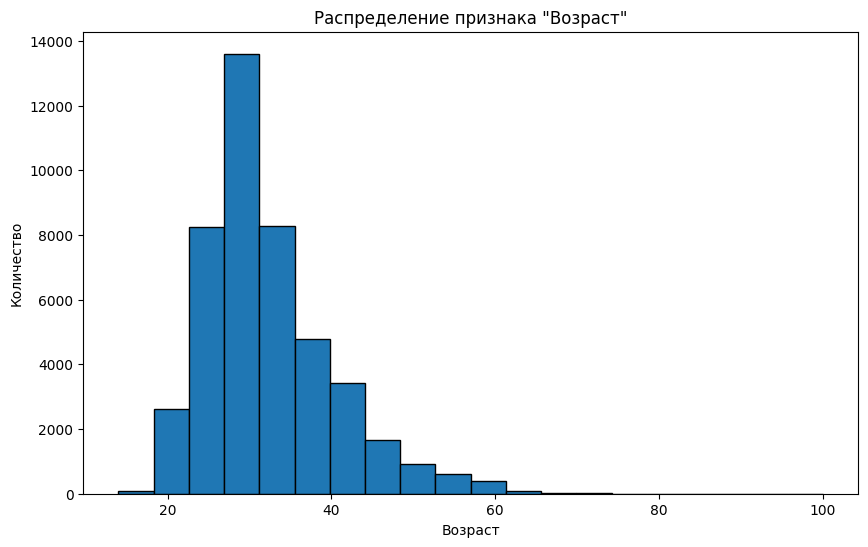

In [34]:
# ваш код здесь
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['Возраст'], bins=20, edgecolor='black')
plt.title('Распределение признака "Возраст"')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

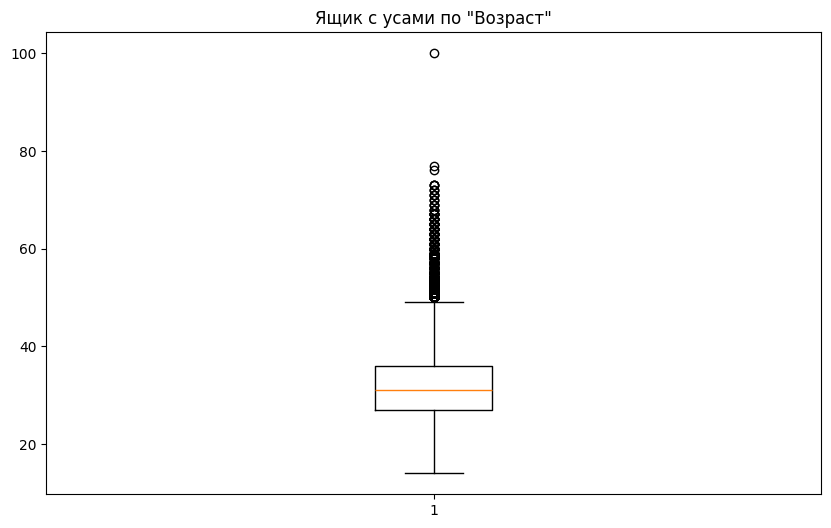

In [35]:
# Ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(df['Возраст'])
plt.title('Ящик с усами по "Возраст"')
plt.show()

In [36]:
mode_age = df['Возраст'].mode().iloc[0]

print("Модальное значение возраста соискателей:", mode_age)

Модальное значение возраста соискателей: 30


ваши выводы по графику здесь

Как мы видим в выборке преобладают люди 25-35 лет, любей моложе 18 практически нет, а специалистами старше 55 можно пренебречь как выбросами

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

fig = go.Figure(data=[
    go.Histogram(x=df['Опыт работы (месяц)'], nbinsx=20, name='Гистограмма'),
    go.Box(x=df['Опыт работы (месяц)'], name='Коробчатая диаграмма')
])

fig.update_layout(title='Распределение признака "Опыт работы (месяц)"', xaxis_title='Опыт работы (месяц)', yaxis_title='Количество')
fig.show()

отложено т к невнятный баг

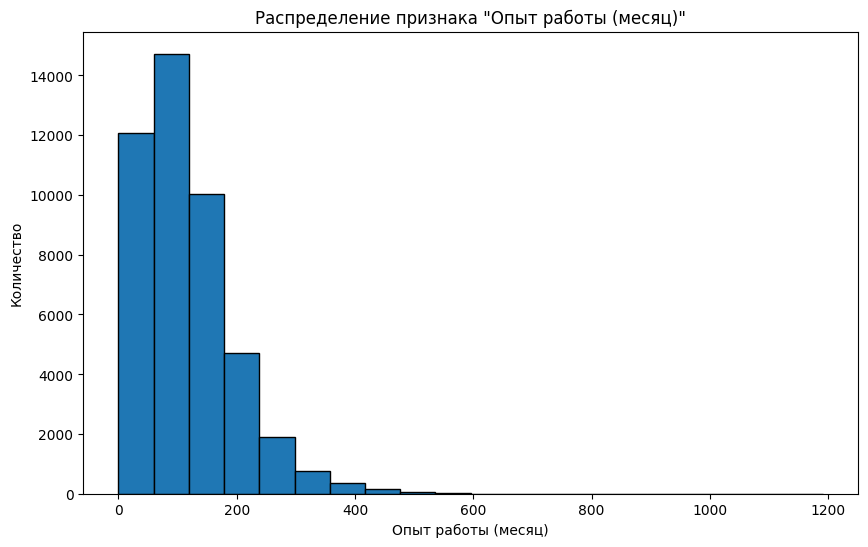

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df['Опыт работы (месяц)'], bins=20, edgecolor='black')
plt.title('Распределение признака "Опыт работы (месяц)"')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Количество')
plt.show()

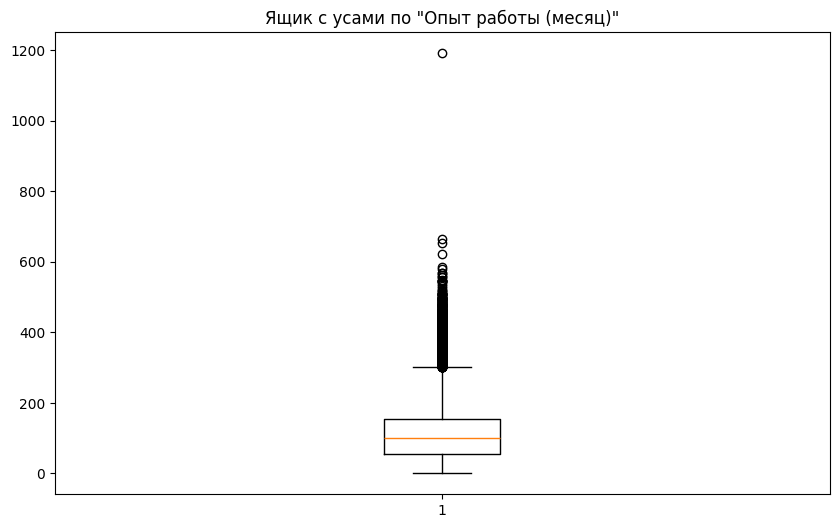

In [38]:
# Ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(df['Опыт работы (месяц)'])
plt.title('Ящик с усами по "Опыт работы (месяц)"')
plt.show()

In [39]:
df[df['Опыт работы (месяц)']>600]

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтёрство,сменный график,полный день,удалённая работа,вахтовый метод,гибкий график,стажировка,ЗП (руб)
3293,Руководитель проектов,430 военное представительство МО РФ,Специалист первой категории,2019-04-26,Имеется собственный автомобиль,Высшее образование,М,73,663,Москва,...,False,False,False,False,True,False,False,False,False,50000.0
10044,Инженер слаботочных систем электрик,"ТЭК СПб, ГУП",Инженер,2019-04-20,Имеется собственный автомобиль,Высшее образование,М,71,653,Санкт-Петербург,...,True,False,False,False,True,False,False,False,False,40000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,Высшее образование,М,48,1191,город-миллионник,...,True,False,False,False,True,False,True,True,False,60000.0
44363,Эксперт (специалист) по информационной безопас...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",2019-04-26,Не указано,Высшее образование (Кандидат наук),М,70,622,Москва,...,False,False,False,False,True,False,False,False,False,350000.0


In [40]:
max_experience = df['Опыт работы (месяц)'].max()

print("Максимальный опыт работы (в месяцах):", max_experience)

Максимальный опыт работы (в месяцах): 1191


ваши выводы здесь

Как мы видим - большая часть соискателей проработала до этого 0-150 месяцев, в то время как соискатели с опытом свыше 300 месяцов практически не находятся в поисках работы\
Тот единственный человек, проработавший 99 лет это исключение

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


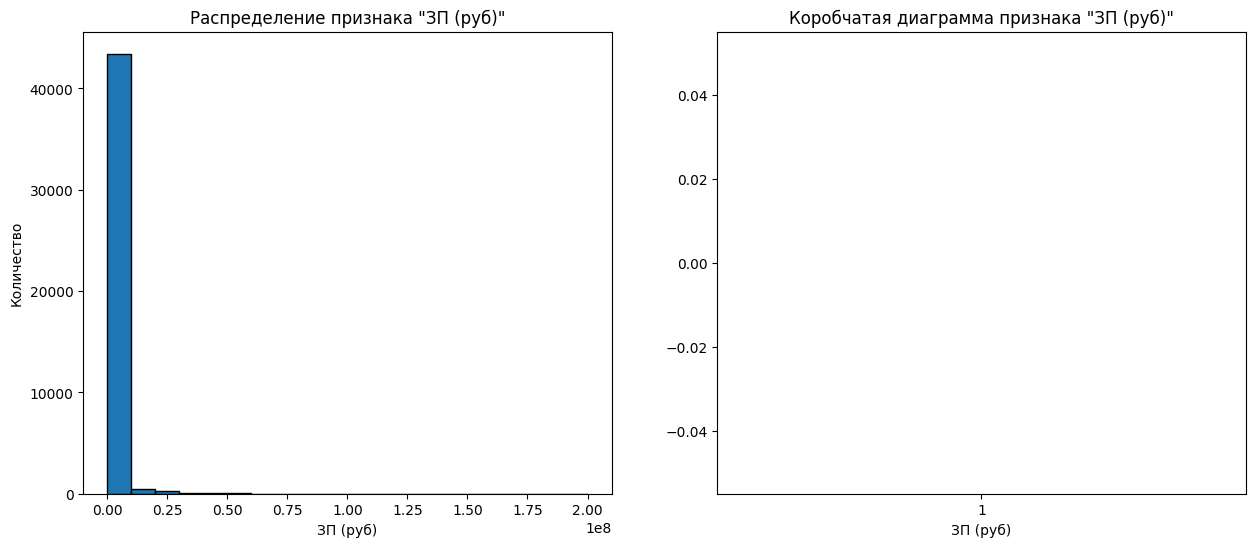

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].hist(df['ЗП (руб)'], bins=20, edgecolor='black')
axs[0].set_title('Распределение признака "ЗП (руб)"')
axs[0].set_xlabel('ЗП (руб)')
axs[0].set_ylabel('Количество')

axs[1].boxplot(df['ЗП (руб)'])
axs[1].set_title('Коробчатая диаграмма признака "ЗП (руб)"')
axs[1].set_xlabel('ЗП (руб)')

plt.show()
# Понятия не имею что с ним не так, потом

ваши выводы здесь

Как мы видим, в среднем сюди получают 15% от возможной ЗП в выборке, всё что больше - исключения для малого количества участников

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [42]:
#df[df['ЗП (руб)']>1000000].count()

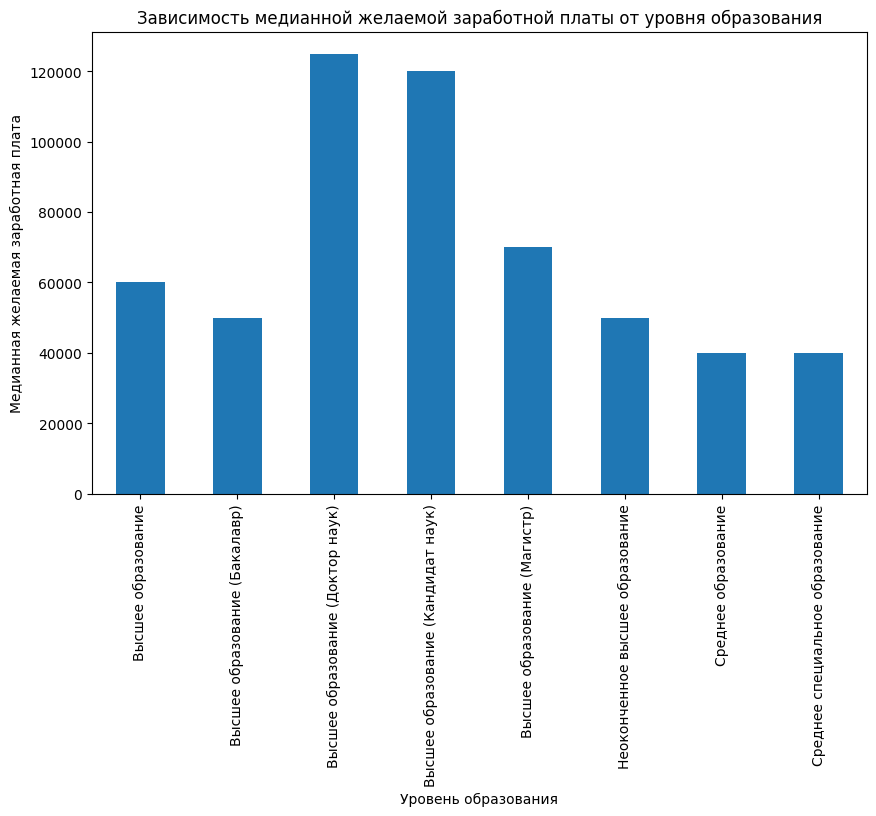

In [43]:
# ваш код здесь
df_2 = df[df['ЗП (руб)'] < 1000000]
# Группируем данные по уровню образования и вычисляем медианную желаемую зп
education_groups = df_2.groupby('Уровень образования')['ЗП (руб)'].median()

# Построение диаграммы
plt.figure(figsize=(10, 6))
education_groups.plot(kind='bar')
plt.title('Зависимость медианной желаемой заработной платы от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная желаемая заработная плата')
plt.show()

ваши выводы здесь

Как мы видим кандидаты и доктора наук имеют наибольшую ЗП, в то время как окончившие СПО и имеющие среднее образование - наименьшую
Признак образование важен, поскольку позволяет примерно оценить то, на какую работу данный специалист может пойти, скорее всего будет нацелен и какая у него предпочтительная зарплатная вилка

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

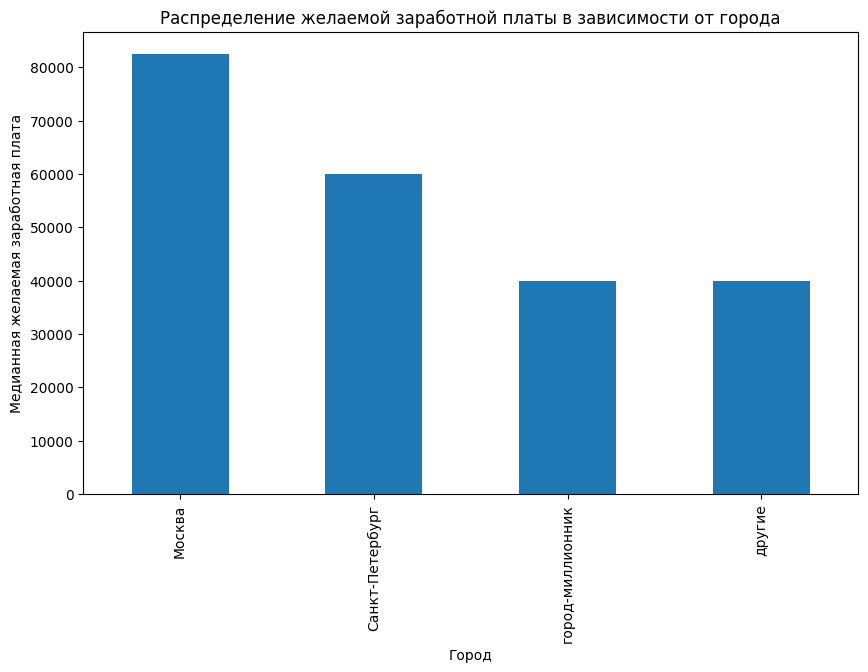

In [44]:
# ваш код здесь
city_groups = df_2.groupby('Город')['ЗП (руб)'].median()

# Построение диаграммы
plt.figure(figsize=(10, 6))
city_groups.plot(kind='bar')
plt.title('Распределение желаемой заработной платы в зависимости от города')
plt.xlabel('Город')
plt.ylabel('Медианная желаемая заработная плата')
plt.show()

In [45]:
max_salary_city = city_groups.idxmax()
print("Город с наибольшим показателем желаемой заработной платы:", max_salary_city)

Город с наибольшим показателем желаемой заработной платы: Москва


ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<Figure size 1000x600 with 0 Axes>

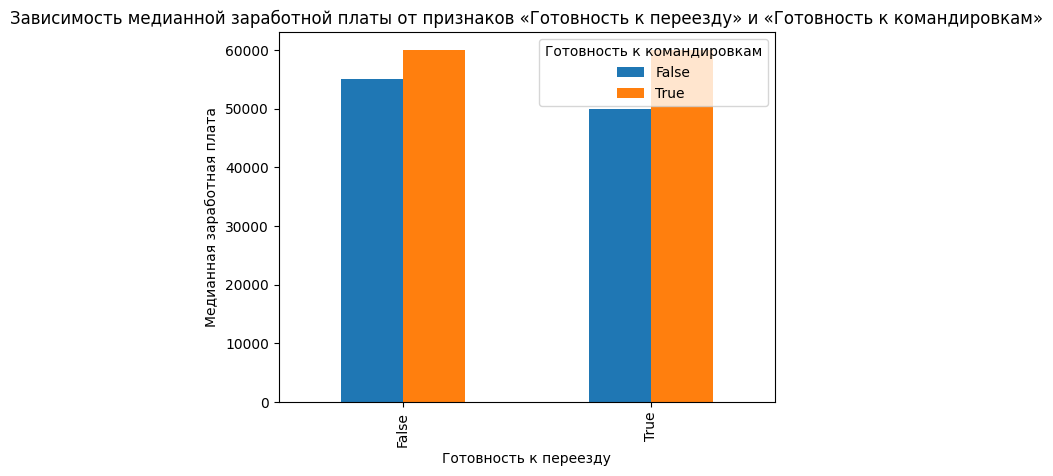

In [46]:
# ваш код здесь
df_grouped_ready = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

# Построение диаграммы
plt.figure(figsize=(10, 6))
df_grouped_ready.plot(kind='bar')
plt.title('Зависимость медианной заработной платы от признаков «Готовность к переезду» и «Готовность к командировкам»')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата')
plt.legend(title='Готовность к командировкам')
plt.show()

In [47]:
df_ready_to_move = df[df['Готовность к переезду'] == True]
df_ready_to_travel = df_ready_to_move[df_ready_to_move['Готовность к командировкам'] == True]

median_salary = df_ready_to_travel['ЗП (руб)'].median()
print("Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам:", round(median_salary / 1000))

Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам: 60


Как мы видим, соотношения по готовности примерно равны и соотносятся примерно 55/45\
Так же мы видим, что люди чаще согласны на командировки, чем на переезд 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

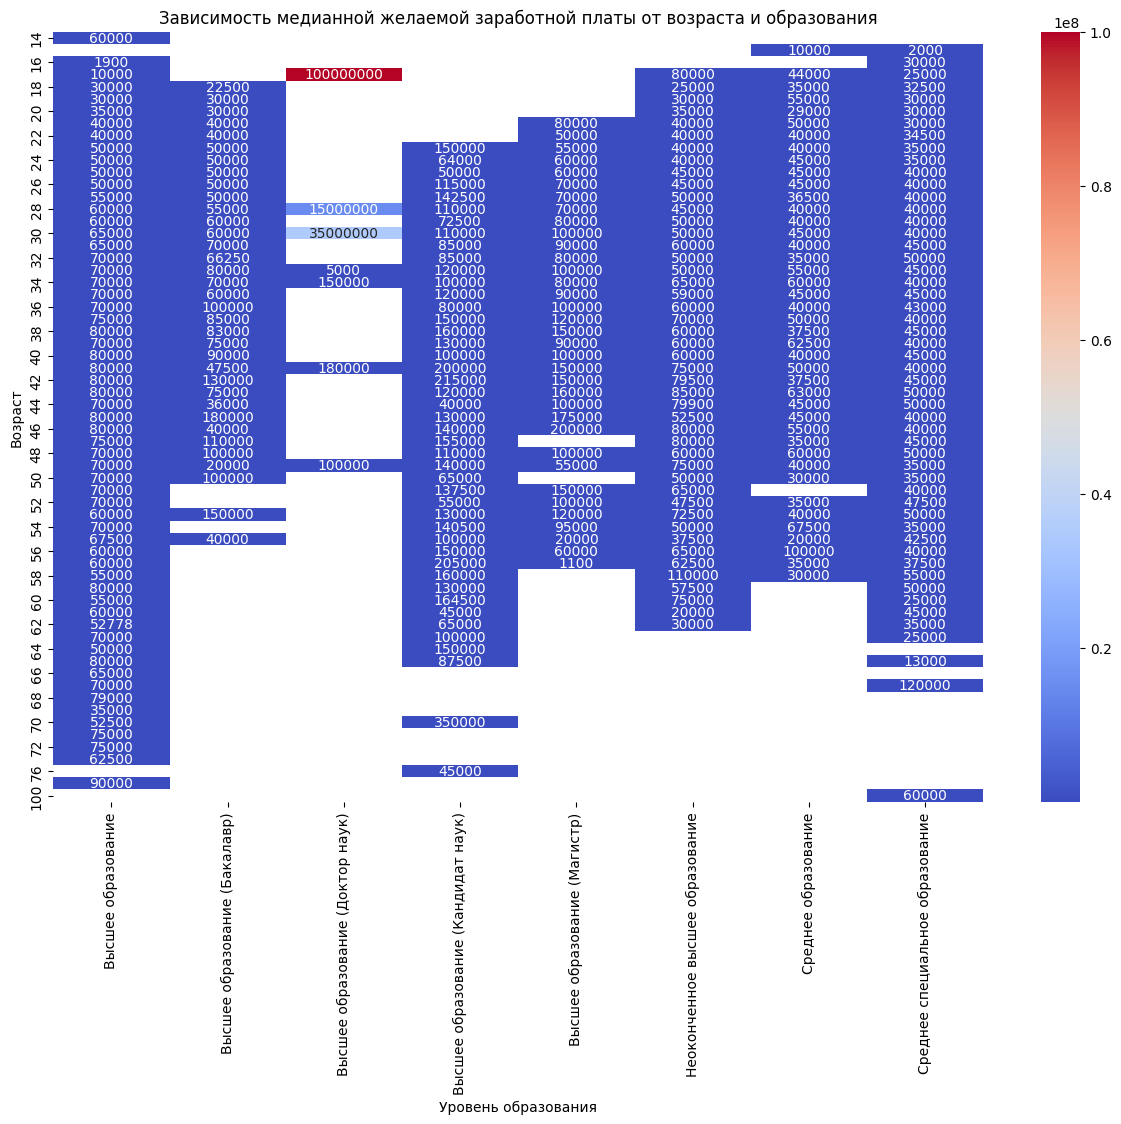

In [48]:
# ваш код здесь
df_grouped_ao = df.groupby(['Возраст', 'Уровень образования'])['ЗП (руб)'].median().unstack()

# Построение тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(df_grouped_ao, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Зависимость медианной желаемой заработной платы от возраста и образования')
plt.xlabel('Уровень образования')
plt.ylabel('Возраст')
plt.show()

In [49]:
# Находим категорию образования с наибольшим приростом заработной платы с возрастом
max_growth_education = df_grouped_ao.columns[(df_grouped_ao.diff(axis=0).mean().values.argmax())]
print("Категория образования с самым быстрым карьерным ростом:", max_growth_education)

Категория образования с самым быстрым карьерным ростом: Высшее образование (Доктор наук)


ваши выводы здесь

Как мы видим, зарплатные ожидания не зависят от возраста - нестабильность и малое количество данных в нашей таблице демонстрируют, что ожидания в среднем варьируются от 30 до 60 тыс с более высокими ожиданиями (60-100 тыс) для получивших высшее образование и несомненным победителем - ожиданиями от 100 тыс до 3,5 млн для молодых докторов наук, при этом внутри групп зарплата между возрастными группами хоть и варьируетс, но делает это максимально неравномерно

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

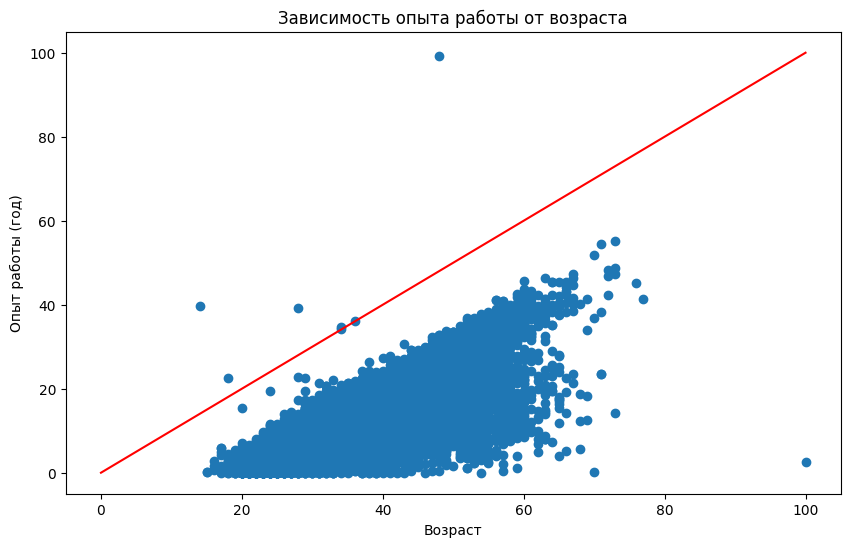

In [50]:
# ваш код здесь
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

plt.figure(figsize=(10, 6))
plt.scatter(df['Возраст'], df['Опыт работы (год)'])
plt.plot([0, 100], [0, 100], color='red')
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')

plt.show()

In [51]:
df_above_line = df[(df['Опыт работы (год)'] > df['Возраст'])]

print("Количество точек, лежащих выше прямой:", len(df_above_line))

Количество точек, лежащих выше прямой: 7


ваши выводы здесь
Как мы видим, связь между опытом работы и возрастом линейна, хоть и не без выбросов - чем старше люди, тем больше у них опыт работы. И да, наш 99 летний специалист оказывается имеет стаж около 0!

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [52]:
# ваш код здесь
df.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтёрство,сменный график,полный день,удалённая работа,вахтовый метод,гибкий график,стажировка,ЗП (руб),Опыт работы (год)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее образование,М,39,202,другие,...,True,False,False,True,False,True,True,False,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее образование,М,60,233,другие,...,True,False,False,True,False,False,True,False,40000.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное образование,Ж,36,123,другие,...,False,False,False,True,False,False,False,False,20000.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее образование,М,38,225,другие,...,True,False,False,False,False,False,True,False,100000.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,67,Москва,...,False,False,False,True,False,False,False,False,140000.0,5.583333


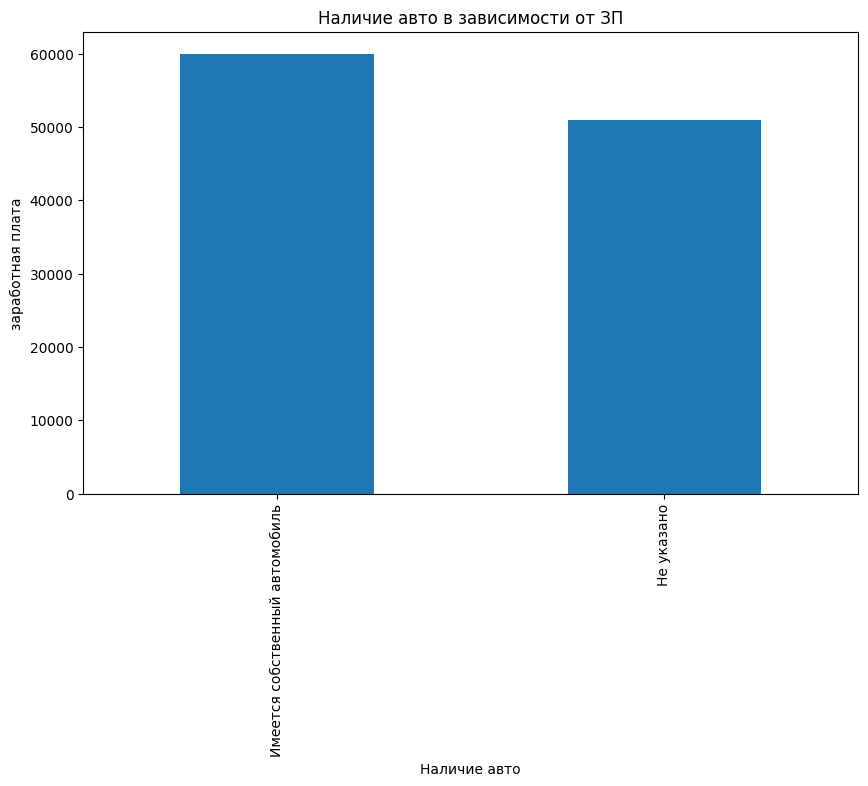

In [53]:
# ваш код здесь
city_groups = df_2.groupby('Авто')['ЗП (руб)'].median()

# Построение диаграммы
plt.figure(figsize=(10, 6))
city_groups.plot(kind='bar')
plt.title('Наличие авто в зависимости от ЗП')
plt.xlabel('Наличие авто')
plt.ylabel('заработная плата')
plt.show()

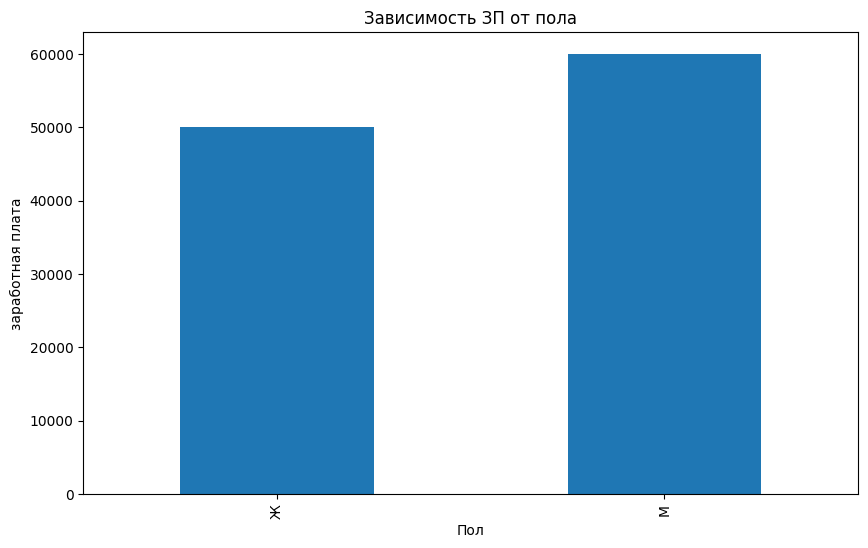

In [54]:
# ваш код здесь
city_groups = df_2.groupby('Пол')['ЗП (руб)'].median()

# Построение диаграммы
plt.figure(figsize=(10, 6))
city_groups.plot(kind='bar')
plt.title('Зависимость ЗП от пола')
plt.xlabel('Пол')
plt.ylabel('заработная плата')
plt.show()

ваши выводы здесь

Как мы видим наличие Авто чаще у людей с большей ЗП, а ЗП у мужчин больше, чем у женщин

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [55]:
# ваш код здесь
duplicates = df[df.duplicated(keep=False)]

print("Количество полных дубликатов:", len(duplicates))
df = df.drop_duplicates()

Количество полных дубликатов: 322


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [56]:
# ваш код здесь
print(df[(df['Опыт работы (месяц)']==0) | (df['Опыт работы (месяц)'].isnull())].count())

Ищет работу на должность:          168
Последнее/нынешнее место работы    168
Последняя/нынешняя должность       168
Обновление резюме                  168
Авто                               168
Уровень образования                168
Пол                                168
Возраст                            168
Опыт работы (месяц)                168
Город                              168
Готовность к переезду              168
Готовность к командировкам         168
полная занятость                   168
частичная занятость                168
проектная работа                   168
волонтёрство                       168
сменный график                     168
полный день                        168
удалённая работа                   168
вахтовый метод                     168
гибкий график                      168
стажировка                         168
ЗП (руб)                           167
Опыт работы (год)                  168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [57]:
# ваш код здесь
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)

mean_experience = df['Опыт работы (месяц)'].mean()
print(round(mean_experience))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [58]:
# ваш код здесь
df_new = df[(df['ЗП (руб)'] > 1000) & (df['ЗП (руб)'] < 1000000)]

outliers = len(df) - len(df_new)
print("Количество выбросов:", outliers)

Количество выбросов: 1928


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [59]:
df_new['Опыт работы (год)'] = df_new['Опыт работы (месяц)'] / 12
outliers = df_new[(df_new['Опыт работы (год)'] > df_new['Возраст']) & (df_new['Опыт работы (год)'] != 0)]

df_new = df_new[~((df_new['Опыт работы (год)'] > df_new['Возраст']) & (df_new['Опыт работы (год)'] != 0))]

num_outliers = len(outliers)
print("Количество выбросов:", num_outliers)

Количество выбросов: 6


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Логарифмическое распределение


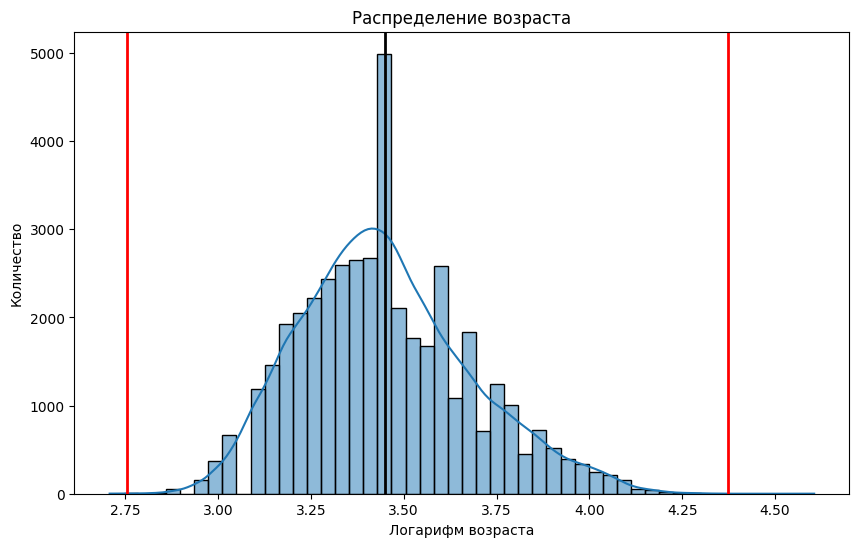

In [60]:
# ваш код здесь
log_age = np.log(df_new['Возраст'])

plt.figure(figsize=(10, 6))
sns.histplot(log_age, bins=50, kde=True)
plt.axvline(log_age.mean(), color='k', lw=2)
plt.axvline(log_age.mean() - 3 * log_age.std(), color='r', lw=2)
plt.axvline(log_age.mean() + 4 * log_age.std(), color='r', lw=2)
plt.title('Распределение возраста')
plt.xlabel('Логарифм возраста')
plt.ylabel('Количество')
print('Логарифмическое распределение')
plt.show()

In [61]:
outliers = df_new[(np.log(df_new['Возраст']) < log_age.mean() - 3 * log_age.std()) | (np.log(df_new['Возраст']) > log_age.mean() + 4 * log_age.std())]

display(outliers)

df_new = df_new[~((np.log(df_new['Возраст']) < log_age.mean() - 3 * log_age.std()) | (np.log(df_new['Возраст']) > log_age.mean() + 4 * log_age.std()))]

num_outliers = len(outliers)
print("Количество выбросов:", num_outliers)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Уровень образования,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтёрство,сменный график,полный день,удалённая работа,вахтовый метод,гибкий график,стажировка,ЗП (руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее образование,М,15,2,Санкт-Петербург,...,False,False,False,False,False,False,True,False,10000.0,0.166667
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное образование,М,15,3,другие,...,False,False,False,True,False,False,False,False,2000.0,0.250000
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное образование,М,100,30,Санкт-Петербург,...,True,False,False,True,False,False,True,False,60000.0,2.500000


Количество выбросов: 3


ваш коммментарий здесь

В результате работы мы проанализировали данные по соискателям на hh.ru, привели их в хороший для анализа вид и очистили их от пропусков, дубликатов и выбросов